In [110]:
import pandas as pd

import glob
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
files = np.sort(glob.glob("/content/drive/MyDrive/Combined_data/*.csv"))
import keras


dataframe = pd.DataFrame(columns=['temp_vals','label'])
empty_list = []
label_list = []
for i in files:
    df = pd.read_csv(i)
    create_arr = df.iloc[:, 0].to_list()
    empty_list.append(create_arr)
    if 'Grad_temp_drop' in i:
        label_list.append(1)
    elif 'Shrp_temp_drop' in i:
        label_list.append(0)

dataframe['temp_vals'] = empty_list
dataframe['label'] = label_list

X = dataframe['temp_vals'].to_list()
Y = dataframe['label'].to_list()

print(len(X))

66


In [111]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

46
20
46
20


In [112]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
import tensorflow as tf
from tensorflow.keras import layers


In [113]:
model = Sequential([
    Dense(10, activation='relu', input_shape=(450,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 10)                4510      
                                                                 
 dense_41 (Dense)            (None, 32)                352       
                                                                 
 dense_42 (Dense)            (None, 32)                1056      
                                                                 
 dense_43 (Dense)            (None, 1)                 33        
                                                                 
Total params: 5,951
Trainable params: 5,951
Non-trainable params: 0
_________________________________________________________________


In [114]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [115]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=50,
          validation_data=(X_test, Y_test))

Epoch 1/50
2/2 [==============================] - 1s 189ms/step - loss: 0.9502 - accuracy: 0.4348 - val_loss: 0.7016 - val_accuracy: 0.6500
Epoch 2/50
2/2 [==============================] - 0s 42ms/step - loss: 0.8700 - accuracy: 0.4565 - val_loss: 0.6486 - val_accuracy: 0.6500
Epoch 3/50
2/2 [==============================] - 0s 37ms/step - loss: 0.7333 - accuracy: 0.5000 - val_loss: 0.6278 - val_accuracy: 0.6500
Epoch 4/50
2/2 [==============================] - 0s 34ms/step - loss: 0.7106 - accuracy: 0.5217 - val_loss: 0.5687 - val_accuracy: 0.7000
Epoch 5/50
2/2 [==============================] - 0s 32ms/step - loss: 0.6728 - accuracy: 0.5652 - val_loss: 0.5744 - val_accuracy: 0.8000
Epoch 6/50
2/2 [==============================] - 0s 83ms/step - loss: 0.6422 - accuracy: 0.6739 - val_loss: 0.6260 - val_accuracy: 0.8500
Epoch 7/50
2/2 [==============================] - 0s 53ms/step - loss: 0.6555 - accuracy: 0.7391 - val_loss: 0.5567 - val_accuracy: 0.8000
Epoch 8/50
2/2 [==========

In [116]:
model.evaluate(X_test, Y_test)[1]

1/1 [==============================] - 0s 57ms/step - loss: 0.1000 - accuracy: 0.9500


0.949999988079071

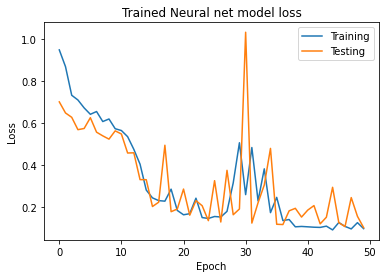

In [117]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Trained Neural net model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='upper right')
plt.savefig('model_loss.png')

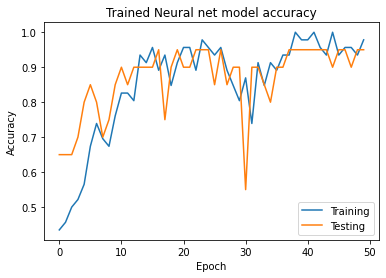

In [118]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Trained Neural net model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Testing'], loc='lower right')
plt.savefig('model_accuracy.png')

In [1]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
yhat_probs = model.predict(X_test)
yhat_classes = (yhat_probs > 0.5).astype("int32")
report = classification_report(Y_test, yhat_classes)
print(report)
matrix = confusion_matrix(Y_test, yhat_classes)
print(matrix)


NameError: ignored